In [1]:
#from google.colab import files
#uploaded = files.upload()

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
file_path = "../data_final.csv"
file_path = "data_final.csv"
df = pd.read_csv(file_path)

In [6]:
import pandas as pd
df = df.dropna(subset=['bpm', 'energy', 'danceability', 'loudness',
                        'valence', 'length', 'acousticness', 'artist_seperation'])

In [7]:
def mode_language(series):
    non_null = series.dropna()
    if non_null.empty:
        return None
    else:
        return non_null.mode().iloc[0]

artist_mode = df.groupby('artist')['language'].apply(mode_language)

def impute_language(row):
    if pd.isnull(row['language']):
        return artist_mode.get(row['artist'], None)
    else:
        return row['language']

df['language'] = df.apply(impute_language, axis=1)

In [8]:
df = df.dropna(subset=['language'])

In [9]:
df['english_lang'] = (df['language'] == 'English').astype(int)
df['ukrainian_lang'] = (df['language'] == 'Ukrainian').astype(int)
df['russian_lang'] = (df['language'] == 'Russian').astype(int)
df['other_lang'] = (
    (df['language'] != 'Russian') &
    (df['language'] != 'Ukrainian') &
    (df['language'] != 'English')
).astype(int)

In [10]:
df['fall_release'] = (df['release_season'] == 'Fall').astype(int)
df['spring_release'] = (df['release_season'] == 'Spring').astype(int)
df['summer_release'] = (df['release_season'] == 'Summer').astype(int)
df['winter_release'] = (df['release_season'] == 'Winter').astype(int)

In [11]:
missing_rows = df[df.isnull().any(axis=1)]
print(f'The percentage of entries with missing data: {len(missing_rows)/len(df) * 100:.2f}%')
print("- " * 30)
for column in df.columns:
    missing_count = df[column].isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100
    if missing_percentage != 0:
        print(f"  Column '{column}': \n       Missing values count: {missing_count}, {missing_percentage:.2f}% missing\n")

The percentage of entries with missing data: 37.60%
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
  Column 'release_date': 
       Missing values count: 19, 0.58% missing

  Column 'release_month': 
       Missing values count: 19, 0.58% missing

  Column 'release_season': 
       Missing values count: 19, 0.58% missing

  Column 'genre': 
       Missing values count: 1219, 37.14% missing



In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3282 entries, 0 to 3579
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3282 non-null   int64  
 1   track_id           3282 non-null   object 
 2   artist             3282 non-null   object 
 3   song               3282 non-null   object 
 4   release_date       3263 non-null   object 
 5   total_weeks        3282 non-null   int64  
 6   peak_position      3282 non-null   int64  
 7   peak_streams       3282 non-null   int64  
 8   total_streams      3282 non-null   int64  
 9   release_month      3263 non-null   float64
 10  release_season     3263 non-null   object 
 11  first_peak_date    3282 non-null   object 
 12  peak_season        3282 non-null   object 
 13  language           3282 non-null   object 
 14  genre              2063 non-null   object 
 15  popularity         3282 non-null   float64
 16  bpm                3282 non-n

In [13]:
df.head(10)

,Unnamed: 0,track_id,artist,song,release_date,total_weeks,peak_position,peak_streams,total_streams,release_month,release_season,first_peak_date,peak_season,language,genre,popularity,bpm,energy,danceability,loudness,valence,length,acousticness,artist_seperation,debut_position,english_lang,ukrainian_lang,russian_lang,other_lang,fall_release,spring_release,summer_release,winter_release
0,0,61BaxM1NIcadLu3gtWm2uT,sadsvit,силуети,2022-10-28,126,1,263673,17102909,10.0,Fall,2022-11-03,Fall,Ukrainian,Rock,61.0,77.0,86.0,53.0,-7.0,39.0,177.0,2.0,61.0,1,0,1,0,0,1,0,0,0
1,1,2QjOHCTQ1Jl3zawyYOpxh6,the neighbourhood,sweater weather,2013-04-22,234,16,75675,12393368,4.0,Spring,2022-10-13,Fall,English,Hip Hop,91.0,124.0,81.0,61.0,-3.0,40.0,240.0,5.0,91.0,171,1,0,0,0,0,1,0,0
2,2,4MQmxIxM5CXKjdq4IrCWhd,sadsvit,касета,2021-12-13,154,1,296336,11790369,12.0,Winter,2024-11-28,Fall,Ukrainian,Rock,61.0,170.0,74.0,65.0,-7.0,63.0,144.0,30.0,61.0,53,0,1,0,0,0,0,0,1
3,3,6gtK39SLszESqJFu2SkId3,wellboy,додому,2022-12-16,117,5,115203,10613534,12.0,Winter,2023-10-05,Fall,Ukrainian,Soul,54.0,115.0,76.0,77.0,-6.0,38.0,170.0,18.0,54.0,79,0,1,0,0,0,0,0,1
4,4,66Xj2OpnDALdW0G509b9yY,yaktak,погляд,2022-10-13,108,1,171097,9534146,10.0,Fall,2023-06-08,Summer,Ukrainian,NaN,54.0,110.0,79.0,76.0,-5.0,55.0,177.0,9.0,54.0,57,0,1,0,0,1,0,0,0
5,5,21LIoC4ZxT3F8xq9gidNbX,xxxmanera,never broke again,2022-04-08,145,1,129007,9524035,4.0,Spring,2022-07-21,Summer,English,NaN,60.0,140.0,57.0,64.0,-7.0,70.0,108.0,1.0,60.0,96,1,0,0,0,0,1,0,0
6,6,6bCLkzoE3agC7Ws9NxVxIn,krbk,крепче,2016-01-05,118,8,129377,9492031,1.0,Winter,2024-03-21,Spring,Russian,NaN,63.0,78.0,31.0,77.0,-14.0,71.0,120.0,87.0,63.0,184,0,0,1,0,0,0,0,1
7,7,1N8TTK1Uoy7UvQNUazfUt5,thxsomch,spit in my face!,2022-12-20,113,1,241572,9187236,12.0,Winter,2022-11-24,Fall,English,Hip Hop,80.0,94.0,79.0,73.0,-7.0,65.0,148.0,5.0,80.0,100,1,0,0,0,0,0,0,1
8,8,2GxrNKugF82CnoRFbQfzPf,artemas,i like the way you kiss me,2024-03-19,54,1,509776,9051129,3.0,Spring,2024-03-28,Spring,English,Electronic,84.0,152.0,95.0,60.0,-4.0,75.0,143.0,0.0,84.0,107,1,0,0,0,0,1,0,0
9,9,0vByMmR3Y8MBorEEE5Pmie,parfeniuk,відриваючись,2023-05-03,100,5,165999,9034842,5.0,Spring,2023-05-11,Spring,Ukrainian,NaN,56.0,125.0,68.0,69.0,-6.0,55.0,150.0,53.0,56.0,77,0,1,0,0,0,1,0,0


# Testing the significance of the debut position on the peak position.

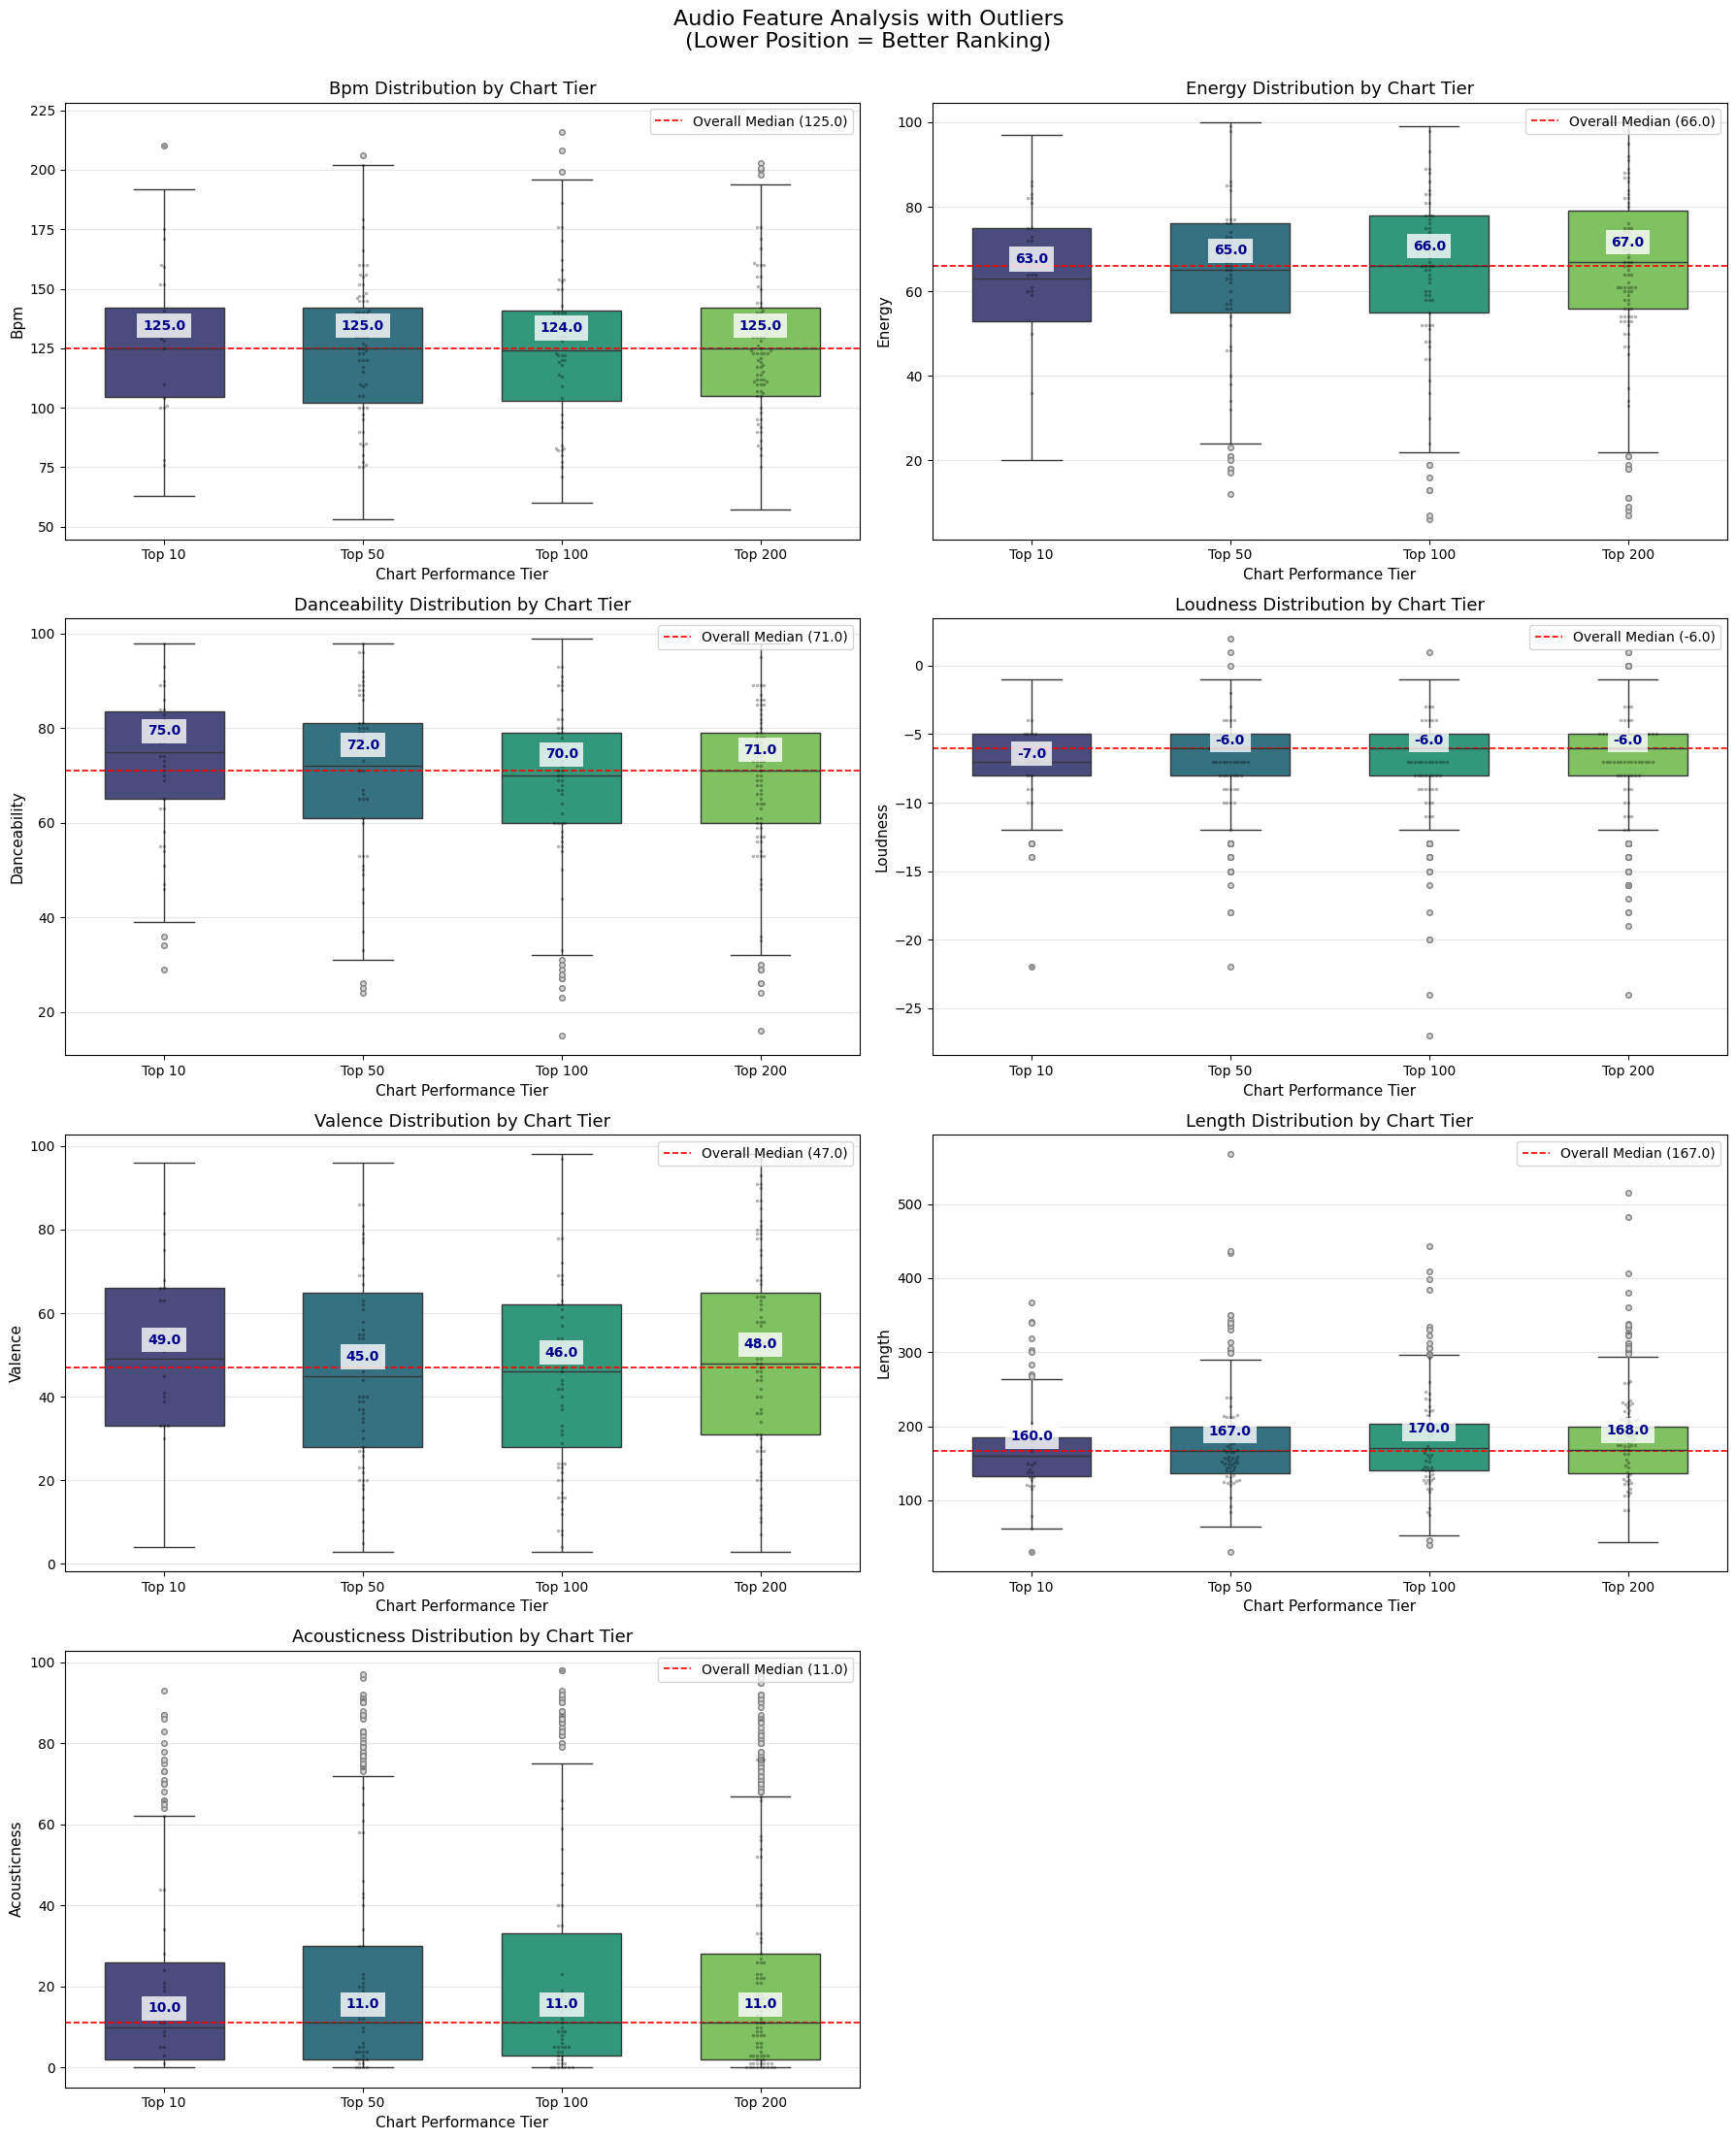

In [14]:
df['chart_tier'] = pd.cut(df['peak_position'],
                         bins=[0, 10, 50, 100, 200],
                         labels=['Top 10', 'Top 50', 'Top 100', 'Top 200'])

audio_features = [
    'bpm',
    'energy',
    'danceability',
    'loudness',
    'valence',
    'length',
    'acousticness'
]

fig, axes = plt.subplots(4, 2, figsize=(18, 22))
axes = axes.flatten()

flierprops = dict(marker='o', markerfacecolor='lightgray',
                  markersize=4, linestyle='none',
                  markeredgecolor='gray')

for idx, feature in enumerate(audio_features):
    ax = axes[idx]

    box = sns.boxplot(
        x='chart_tier',
        y=feature,
        data=df,
        ax=ax,
        palette='viridis',
        showfliers=True,
        width=0.6,
        flierprops=flierprops
    )

    sns.swarmplot(
        x='chart_tier',
        y=feature,
        data=df.sample(200),
        ax=ax,
        color='black',
        alpha=0.3,
        size=2.5
    )

    medians = df.groupby('chart_tier')[feature].median().values

    for i, tier in enumerate(df['chart_tier'].cat.categories):
        x_pos = i
        median_val = medians[i]

        ax.text(
            x=x_pos,
            y=median_val + 0.03 * df[feature].max(),
            s=f'{median_val:.1f}',
            ha='center',
            va='bottom',
            color='darkblue',
            fontsize=10,
            fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
        )

    overall_median = df[feature].median()
    ax.axhline(overall_median, color='red', linestyle='--',
               linewidth=1.2, label=f'Overall Median ({overall_median:.1f})')

    ax.set_title(f'{feature.title()} Distribution by Chart Tier', fontsize=13)
    ax.set_xlabel('Chart Performance Tier', fontsize=11)
    ax.set_ylabel(feature.title(), fontsize=11)
    ax.legend(loc='upper right')
    ax.grid(axis='y', alpha=0.3)

fig.delaxes(axes[7])

plt.suptitle('Audio Feature Analysis with Outliers\n(Lower Position = Better Ranking)',
             fontsize=16, y=1.0)
plt.tight_layout()
plt.show()

In [15]:
#from google.colab import files
#uploaded = files.upload()

In [16]:
file_path1 = "ua_spotify_chart_history.csv"
file_path1 = "ua_spotify_chart_history.csv"
df1 = pd.read_csv(file_path1)
df1.head(10)

,artist,song,date,ua_position,ua_streams
0,SadSvit,Силуети,2022/11/03,1,206686
1,SadSvit,Силуети,2022/11/10,1,244275
2,SadSvit,Силуети,2022/11/17,1,263673
3,SadSvit,Силуети,2022/11/24,2,224173
4,SadSvit,Силуети,2022/12/01,2,204662
5,SadSvit,Силуети,2022/12/08,2,186854
6,SadSvit,Силуети,2022/12/15,1,181295
7,SadSvit,Силуети,2022/12/22,2,173868
8,SadSvit,Силуети,2022/12/29,1,186573
9,SadSvit,Силуети,2023/01/05,2,185185


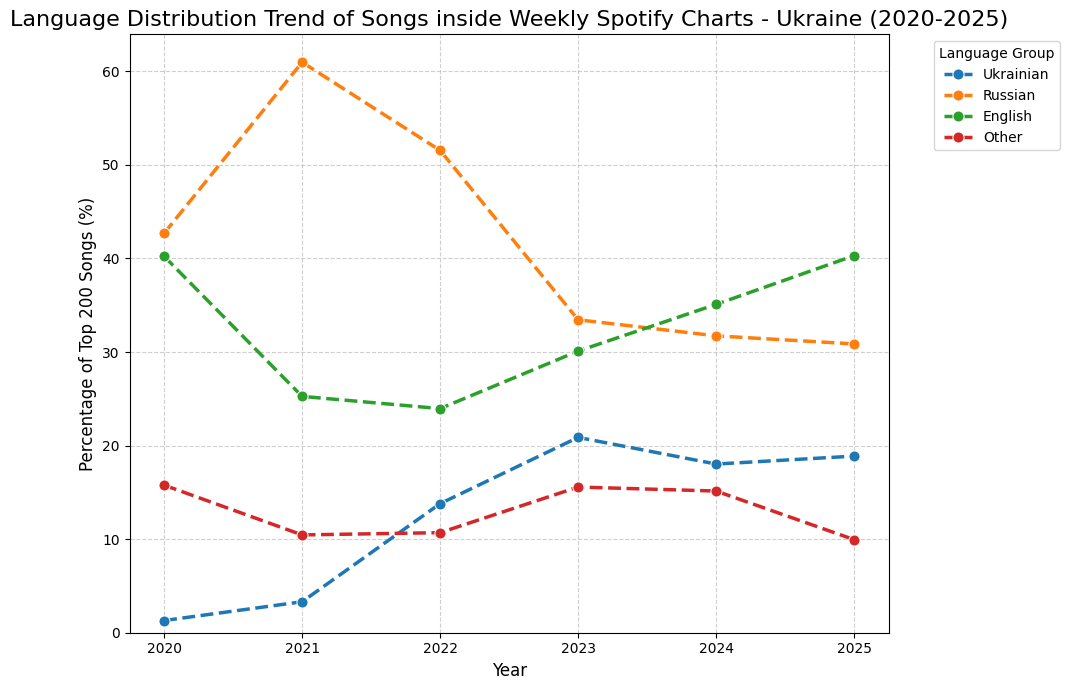

In [17]:
chart_history_file = "ua_spotify_chart_history.csv"
metadata_file = "data_final.csv"
target_years = list(range(2020, 2026))
top_n_filter = 200

df_chart = pd.read_csv(chart_history_file)

df_chart.columns = df_chart.columns.str.strip()
required_chart_cols = ['artist', 'song', 'date', 'ua_position']
if not all(col in df_chart.columns for col in required_chart_cols):
    exit()

if 'artist' in df_chart.columns:
    df_chart['artist'] = df_chart['artist'].astype(str).str.lower()
if 'song' in df_chart.columns:
    df_chart['song'] = df_chart['song'].astype(str).str.lower()

df_chart['date'] = pd.to_datetime(df_chart['date'], errors='coerce')
df_chart = df_chart.dropna(subset=['artist', 'song', 'date', 'ua_position'])

df_chart['ua_position'] = pd.to_numeric(df_chart['ua_position'], errors='coerce')
df_chart = df_chart.dropna(subset=['ua_position'])
df_chart['ua_position'] = df_chart['ua_position'].astype(int)

df_chart_top_n = df_chart[df_chart['ua_position'] <= top_n_filter].copy()

df_chart_top_n['year'] = df_chart_top_n['date'].dt.year.astype(int)
df_chart_filtered = df_chart_top_n[df_chart_top_n['year'].isin(target_years)].copy()

chart_entries = df_chart_filtered[['artist', 'song', 'year']].drop_duplicates()
chart_entries['in_chart'] = True

presence_pivot = pd.pivot_table(
    chart_entries,
    index=['artist', 'song'],
    columns='year',
    values='in_chart',
    fill_value=False
)

presence_pivot = presence_pivot.reindex(columns=target_years, fill_value=False)
presence_df = presence_pivot.reset_index()
presence_df.columns.name = None

df_meta = pd.read_csv(metadata_file)

if all(col in df_meta.columns for col in ['artist', 'song', 'language']):
    df_lang = df_meta[['artist', 'song', 'language']].copy()
    df_lang = df_lang.dropna(subset=['artist', 'song'])
    df_lang = df_lang.drop_duplicates(subset=['artist', 'song'], keep='first')

    if 'artist' in df_lang.columns:
        df_lang['artist'] = df_lang['artist'].astype(str).str.lower()
    if 'song' in df_lang.columns:
        df_lang['song'] = df_lang['song'].astype(str).str.lower()
else:
    df_lang = pd.DataFrame(columns=['artist', 'song', 'language'])

final_df = pd.merge(
    presence_df,
    df_lang,
    on=['artist', 'song'],
    how='left'
)
final_df['language'] = final_df['language'].fillna('Unknown')

main_languages = ['Ukrainian', 'Russian', 'English']
final_df['language_grouped'] = np.where(
    final_df['language'].isin(main_languages),
    final_df['language'],
    'Other'
)

id_vars = ['artist', 'song', 'language', 'language_grouped']
value_vars = [col for col in target_years]
df_long = pd.melt(
    final_df,
    id_vars=id_vars,
    value_vars=value_vars,
    var_name='year',
    value_name='in_chart'
)

df_long['year'] = df_long['year'].astype(int)
df_plot_data = df_long[df_long['in_chart'] == True].copy()

lang_counts_per_year = df_plot_data.groupby(['year', 'language_grouped']).size().reset_index(name='count')
total_songs_per_year = df_plot_data.groupby('year').size().reset_index(name='total_count')
lang_perc_per_year = pd.merge(lang_counts_per_year, total_songs_per_year, on='year')
lang_perc_per_year['percentage'] = (lang_perc_per_year['count'] / lang_perc_per_year['total_count']) * 100

plt.figure(figsize=(12, 7))

category_order = ['Ukrainian', 'Russian', 'English', 'Other']

sns.lineplot(
    data=lang_perc_per_year,
    x='year',
    y='percentage',
    hue='language_grouped',
    hue_order=category_order,
    linestyle='--',
    markers=True,
    marker='o',
    markersize=8,
    linewidth=2.5
)

plt.title(f'Language Distribution Trend of Songs inside Weekly Spotify Charts - Ukraine ({target_years[0]}-{target_years[-1]})', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel(f'Percentage of Top {top_n_filter} Songs (%)', fontsize=12)
plt.xticks(target_years)
plt.legend(title='Language Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

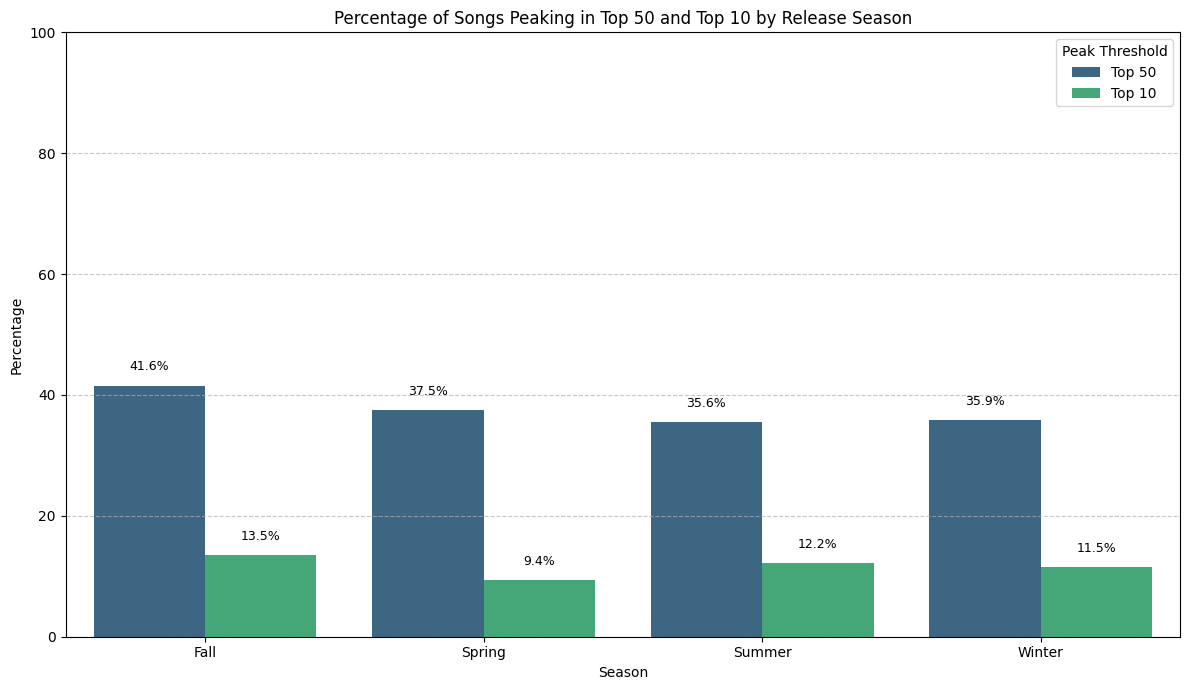

In [18]:
top_50_threshold = 50
top_10_threshold = 10

df['is_top_50'] = df['peak_position'] <= top_50_threshold

season_top_50_percentage = df.groupby('release_season')['is_top_50'].mean().reset_index()
season_top_50_percentage['percentage'] = season_top_50_percentage['is_top_50'] * 100
season_top_50_percentage['threshold'] = f'Top {top_50_threshold}'

df['is_top_10'] = df['peak_position'] <= top_10_threshold

season_top_10_percentage = df.groupby('release_season')['is_top_10'].mean().reset_index()
season_top_10_percentage['percentage'] = season_top_10_percentage['is_top_10'] * 100
season_top_10_percentage['threshold'] = f'Top {top_10_threshold}'

combined_peak_percentage = pd.concat([season_top_50_percentage, season_top_10_percentage])

plt.figure(figsize=(12, 7))

sns.barplot(x='release_season', y='percentage', hue='threshold', data=combined_peak_percentage, palette='viridis')

plt.title(f'Percentage of Songs Peaking in Top {top_50_threshold} and Top {top_10_threshold} by Release Season')
plt.xlabel('Season')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca()
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
             ax.text(bar.get_x() + bar.get_width() / 2., height + 2,
                     f'{height:.1f}%',
                     ha='center', va='bottom', fontsize=9)


plt.legend(title='Peak Threshold')
plt.tight_layout()
plt.show()